In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('salary_data_cleaned.csv')

In [11]:
df.head(30)

,Job Title,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,...,company_txt,age,python_yn,R_yn,spark,aws,excel,job_simp,seniority,desc_len
0,Data Scientist,Job Description – Data Scientist\n\nLocation: ...,3.4,Buckman\n3.4,Chennai,"Memphis, TN",1001 to 5000 employees,1945,Company - Private,Chemical Manufacturing,...,Buckman\n,75,1,0,0,0,0,data scientist,na,4237
1,Data Scientist,Overview\n\n\nWe have an exciting opportunity ...,4.0,Quanticate\n4.0,Bengaluru,"Hitchin, United Kingdom",201 to 500 employees,1995,Company - Private,Biotech & Pharmaceuticals,...,Quanticate\n,25,1,0,0,0,0,data scientist,na,2405
2,Data Scientist,Provide analytical insights into emerging prob...,3.6,PayPal\n3.6,Bengaluru,"San Jose, CA",10000+ employees,1998,Company - Public,Internet,...,PayPal\n,22,1,0,0,0,0,data scientist,na,1452
3,Data Scientist,Introduction\n• The role will involve running ...,3.9,IBM\n3.9,Bengaluru,"Armonk, NY",10000+ employees,1911,Company - Public,IT Services,...,IBM\n,109,1,0,0,0,0,data scientist,na,3937
4,Data Scientist,"At Amazon, we strive to be most customer-centr...",4.2,Amazon\n4.2,Hyderabad,"Seattle, WA",10000+ employees,1994,Company - Public,Internet,...,Amazon\n,26,1,0,1,1,1,data scientist,na,4616
5,Data Scientist,What You Should Expect\n\nTo ride the wave of ...,4.3,Blue Yonder\n4.3,Bengaluru,"Scottsdale, AZ",5001 to 10000 employees,1985,Company - Private,Enterprise Software & Network Solutions,...,Blue Yonder\n,35,0,0,0,0,0,data scientist,na,1460
6,Data Scientist,Driving Infinite Possibilities Within A Divers...,3.8,Honeywell\n3.8,Bengaluru,"Charlotte, NC",10000+ employees,1885,Company - Public,Computer Hardware & Software,...,Honeywell\n,135,1,0,1,1,1,data scientist,na,2908
7,Data Scientist,Senior Data Scientist\n\nResponsibilities\nCon...,3.9,NICE Actimize\n3.9,Pune,"Hoboken, NJ",501 to 1000 employees,1999,Subsidiary or Business Segment,Computer Hardware & Software,...,NICE Actimize\n,21,1,0,0,0,0,data scientist,na,1178
8,Data Scientist,"When everything's connected, how we connect is...",3.4,TTEC\n3.4,Hyderabad,"Englewood, CO",10000+ employees,1982,Company - Public,Staffing & Outsourcing,...,TTEC\n,38,1,0,0,1,1,data scientist,na,3493
9,Data Scientist,Responsibilities for Data Scientist\nWork with...,3.5,IHS Markit\n3.5,Gurgaon,"London, United Kingdom",10000+ employees,2016,Company - Public,Consulting,...,IHS Markit\n,4,1,0,0,1,1,data scientist,na,3475


In [4]:
df.columns

Index(['Job Title', 'Job Description', 'Rating', 'Company Name', 'Location',
       'Headquarters', 'Size', 'Founded', 'Type of ownership', 'Industry',
       'Sector', 'Revenue', 'Competitors', 'company_txt', 'age', 'python_yn',
       'R_yn', 'spark', 'aws', 'excel'],
      dtype='object')

In [7]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'






In [8]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)
df.job_simp.value_counts()

data scientist    29
Name: job_simp, dtype: int64

In [9]:
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

na    29
Name: seniority, dtype: int64

In [10]:
## job description length
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0     4237
1     2405
2     1452
3     3937
4     4616
5     1460
6     2908
7     1178
8     3493
9     3475
10    6715
11    2118
12    3161
13    3253
14    2098
15    4311
16    2711
17    2491
18    3341
19    1677
20    2432
21    6002
22    1881
23     779
24    3575
25    2509
26    4719
27     544
28     946
Name: desc_len, dtype: int64

In [14]:
##competitor count
df['num_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)
df['num_comp']


0     0
1     3
2     3
3     3
4     3
5     3
6     3
7     2
8     3
9     2
10    3
11    3
12    3
13    0
14    0
15    2
16    3
17    0
18    2
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    3
28    0
Name: num_comp, dtype: int64

In [15]:
df['Competitors']

0                                                    -1
1                         GCE Solutions, Parexel, IQVIA
2                                 Square, Amazon, Apple
3                          Amazon, Accenture, Microsoft
4                            Google, Microsoft, Walmart
5                     SAP, Oracle, Manhattan Associates
6             GE, Johnson Controls, United Technologies
7                                          SAS, Feedzai
8                    Teleperformance, TaskUs, Convergys
9             Thomson Reuters, International Data Group
10             Palantir Technologies, Google, Microsoft
11    Cognizant Technology Solutions, EY, McKinsey &...
12    Capgemini, Cognizant Technology Solutions, Min...
13                                                   -1
14                                                   -1
15                       Fidelity Investments, Vanguard
16                 News Corp, WarnerMedia, NBCUniversal
17                                              

In [20]:
#remove new line from job title
df['company_txt'] = df.company_txt.apply(lambda x: x.replace('\n', ''))
df['company_txt']

0                                               Buckman
1                                            Quanticate
2                                                PayPal
3                                                   IBM
4                                                Amazon
5                                           Blue Yonder
6                                             Honeywell
7                                         NICE Actimize
8                                                  TTEC
9                                            IHS Markit
10                                         QuantumBlack
11                                            Accenture
12                                       Mastek Limited
13                                               KNOREX
14                                  Processware Systems
15                       Franklin Templeton Investments
16                                  Walt Disney Company
17                                              

In [21]:
df.describe()

,Rating,Founded,age,python_yn,R_yn,spark,aws,excel,desc_len,num_comp
count,29.000000,29.000000,29.000000,29.000000,29.0,29.000000,29.000000,29.000000,29.000000,29.000000
mean,3.844828,1848.172414,32.379310,0.827586,0.0,0.137931,0.275862,0.517241,2911.172414,1.517241
std,0.404957,513.262678,34.440854,0.384426,0.0,0.350931,0.454859,0.508548,1493.046862,1.429802
min,3.100000,-1.000000,-1.000000,0.000000,0.0,0.000000,0.000000,0.000000,544.000000,0.000000
25%,3.500000,1972.000000,7.000000,1.000000,0.0,0.000000,0.000000,0.000000,1881.000000,0.000000
50%,3.900000,1995.000000,24.000000,1.000000,0.0,0.000000,0.000000,1.000000,2711.000000,2.000000
75%,4.000000,2009.000000,38.000000,1.000000,0.0,0.000000,1.000000,1.000000,3575.000000,3.000000
max,5.000000,2016.000000,135.000000,1.000000,0.0,1.000000,1.000000,1.000000,6715.000000,3.000000


In [22]:
df.columns

Index(['Job Title', 'Job Description', 'Rating', 'Company Name', 'Location',
       'Headquarters', 'Size', 'Founded', 'Type of ownership', 'Industry',
       'Sector', 'Revenue', 'Competitors', 'company_txt', 'age', 'python_yn',
       'R_yn', 'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

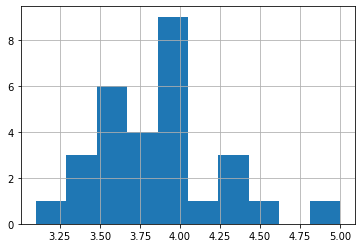

In [23]:
df.Rating.hist()

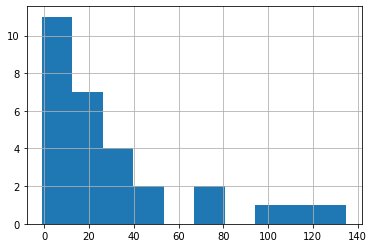

In [24]:
df.age.hist()

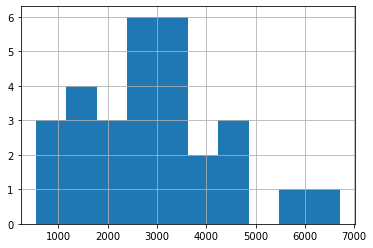

In [25]:
df.desc_len.hist()

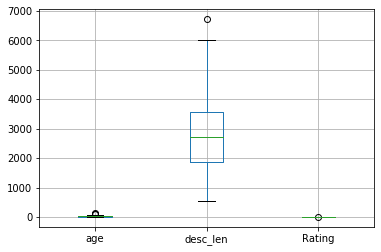

In [31]:
df.boxplot(column = ['age', 'desc_len', 'Rating'])


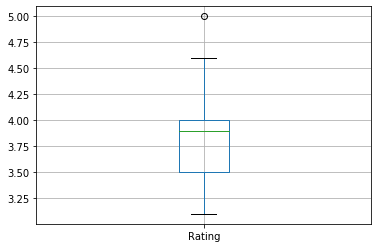

In [30]:
df.boxplot(column = ['Rating'])


In [38]:
df[['age', 'desc_len', 'Rating','Founded']].corr()


,age,desc_len,Rating,Founded
age,1.000000,0.194375,-0.172062,0.205618
desc_len,0.194375,1.000000,0.183479,0.108741
Rating,-0.172062,0.183479,1.000000,-0.269997
Founded,0.205618,0.108741,-0.269997,1.000000


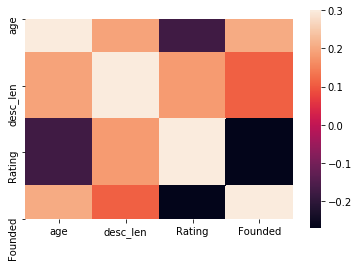

In [41]:
heatmap = sns.heatmap(df[['age', 'desc_len', 'Rating','Founded']].corr(), vmax=.3, square=True)
heatmap

In [43]:
df.columns

Index(['Job Title', 'Job Description', 'Rating', 'Company Name', 'Location',
       'Headquarters', 'Size', 'Founded', 'Type of ownership', 'Industry',
       'Sector', 'Revenue', 'Competitors', 'company_txt', 'age', 'python_yn',
       'R_yn', 'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

In [45]:
df_cat= df[['Location','Headquarters', 'Size','Type of ownership', 'Industry',
       'Sector', 'Revenue','company_txt','python_yn',
       'R_yn', 'spark', 'aws', 'excel', 'job_simp', 'seniority']]

Graph for Location: total = 8


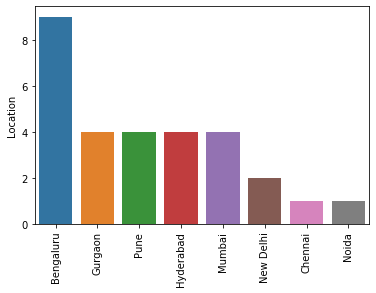

Graph for Headquarters: total = 24


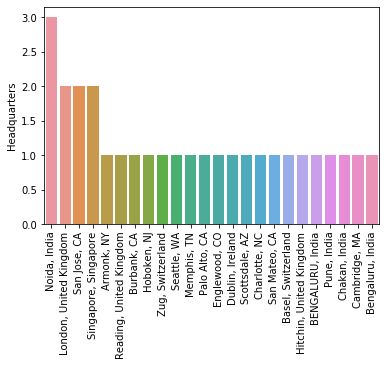

Graph for Size: total = 8


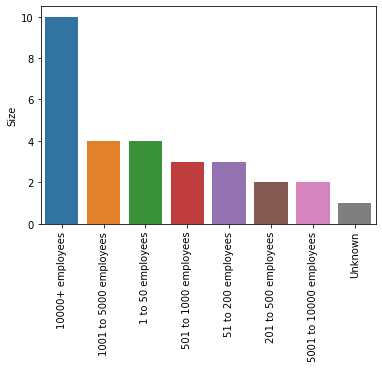

Graph for Type of ownership: total = 5


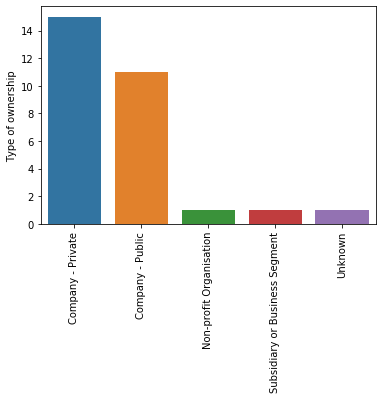

Graph for Industry: total = 14


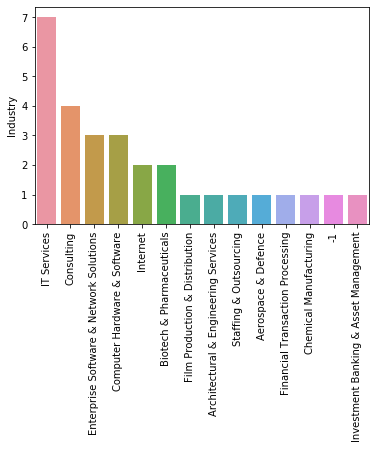

Graph for Sector: total = 8


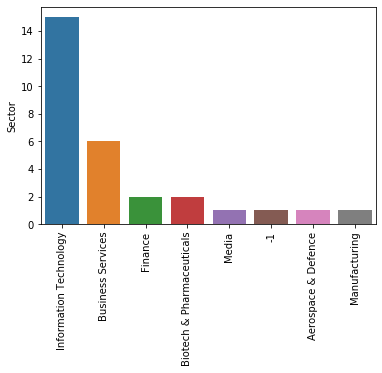

Graph for Revenue: total = 6


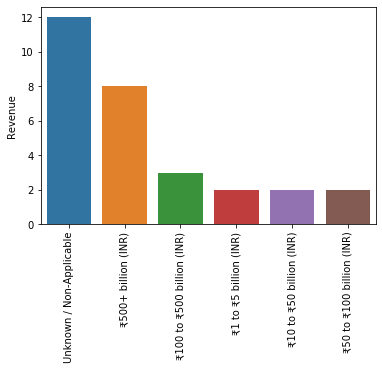

Graph for company_txt: total = 29


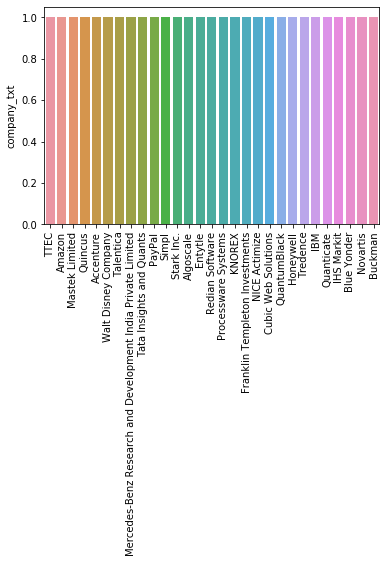

Graph for python_yn: total = 2


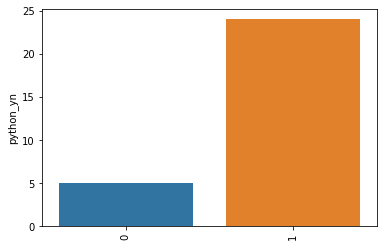

Graph for R_yn: total = 1


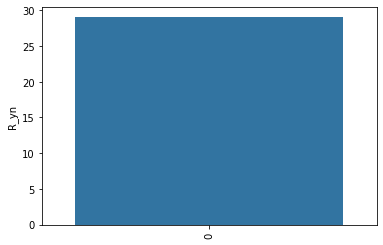

Graph for spark: total = 2


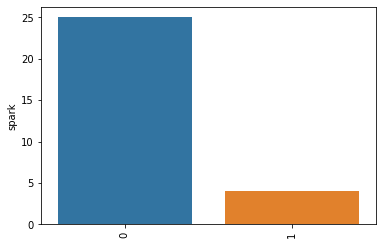

Graph for aws: total = 2


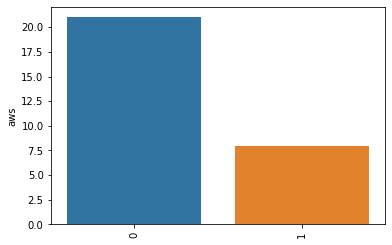

Graph for excel: total = 2


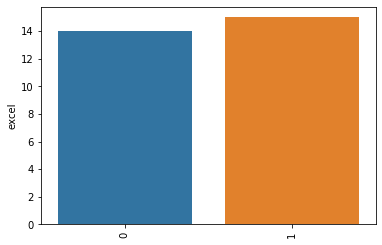

Graph for job_simp: total = 1


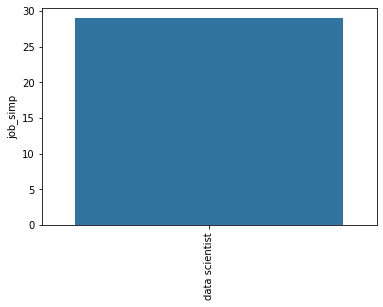

Graph for seniority: total = 1


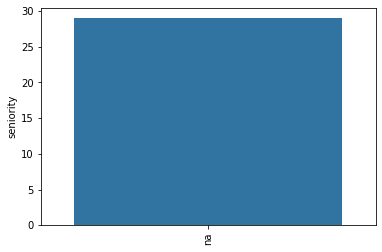

In [49]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("Graph for %s: total = %d" %(i,len(cat_num)))
    chart = sns.barplot(x = cat_num.index, y =cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
    
    plt.show()

Graph for Location: total = 8


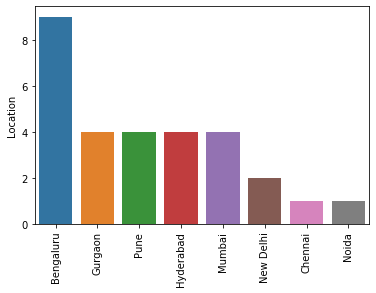

Graph for Headquarters: total = 24


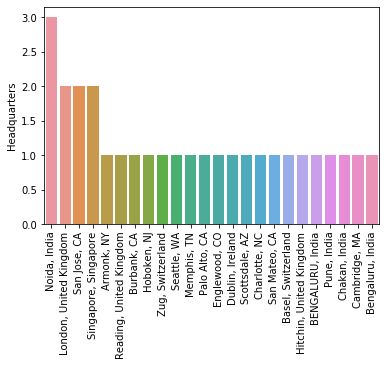

Graph for company_txt: total = 29


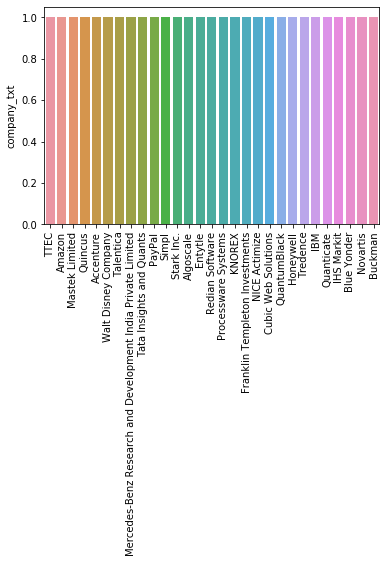

In [53]:
for i in df_cat[['Location', 'Headquarters','company_txt']].columns:
    cat_num = df_cat[i].value_counts()
    print("Graph for %s: total = %d" %(i,len(cat_num)))
    chart = sns.barplot(x = cat_num.index, y =cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
    
    plt.show()

In [54]:
df.columns

Index(['Job Title', 'Job Description', 'Rating', 'Company Name', 'Location',
       'Headquarters', 'Size', 'Founded', 'Type of ownership', 'Industry',
       'Sector', 'Revenue', 'Competitors', 'company_txt', 'age', 'python_yn',
       'R_yn', 'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

In [59]:
pd.pivot_table(df, index = 'Location', values = 'Rating')

,Rating
Location,
Bengaluru,3.822222
Chennai,3.400000
Gurgaon,3.900000
Hyderabad,3.825000
Mumbai,3.850000
New Delhi,4.050000
Noida,3.700000
Pune,3.900000


In [92]:
df_pivots=df[['Location','Industry','Sector', 'Revenue','age', 'python_yn',
       'R_yn', 'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len',
       'num_comp','Type of ownership']]

In [95]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df, index = i, values = 'Rating').sort_values('Rating',ascending = False))
    

Location
             Rating
Location           
New Delhi  4.050000
Gurgaon    3.900000
Pune       3.900000
Mumbai     3.850000
Hyderabad  3.825000
Bengaluru  3.822222
Noida      3.700000
Chennai    3.400000
Industry
                                           Rating
Industry                                         
-1                                       5.000000
Financial Transaction Processing         4.300000
Enterprise Software & Network Solutions  4.066667
Architectural & Engineering Services     4.000000
Biotech & Pharmaceuticals                3.950000
Internet                                 3.900000
Film Production & Distribution           3.900000
Consulting                               3.800000
Investment Banking & Asset Management    3.800000
IT Services                              3.757143
Computer Hardware & Software             3.733333
Chemical Manufacturing                   3.400000
Staffing & Outsourcing                   3.400000
Aerospace & Defence             

In [97]:
pd.pivot_table(df, index = 'Revenue', columns = 'python_yn', values = 'Rating')

python_yn,0,1
Revenue,,
Unknown / Non-Applicable,3.5,4.063636
₹1 to ₹5 billion (INR),NaN,3.750000
₹10 to ₹50 billion (INR),NaN,3.550000
₹100 to ₹500 billion (INR),4.3,3.450000
₹50 to ₹100 billion (INR),3.1,3.400000
₹500+ billion (INR),3.9,3.866667


In [100]:
conda install -c conda-forge wordcloud

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\asus\Anaconda3

  added / updated specs:
    - wordcloud


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    matplotlib-base-3.2.1      |   py37h911224e_0         7.1 MB  conda-forge
    wordcloud-1.7.0            |   py37h4ab8f01_0         197 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         7.3 MB

The following NEW packages will be INSTALLED:

  matplotlib-base    conda-forge/win-64::matplotlib-base-3.2.1-py37h911224e_0
  wordcloud          conda-forge/win-64::wordcloud-1.7.0-py37h4ab8f01_0




wordcloud-1.7.0      | 197 KB    |            |   0% 
wordcloud-1.7.0      | 197 KB    | 8          |   8% 
wordcloud-1.7.0      | 197 KB    | ######4    |  65% 
wordcloud-1.7.0      | 197 KB    | ########## | 100% 

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename C:\Users\asus\Anaconda3\Lib\site-packages\matplotlib\mpl-data\fonts\ttf\DejaVuSans.ttf.  Please remove this file manually (you may need to reboot to free file handles)


In [106]:

import nltk
nltk.download('stopwords')

import nltk
nltk.download('punkt')
 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [107]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

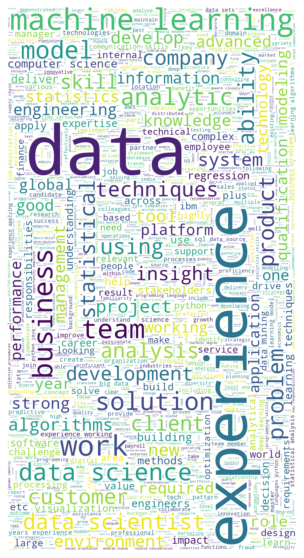

In [108]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered

words_filtered = punctuation_stop(words)
text = " ".join([ele for ele in words_filtered])

wc = WordCloud(background_color='white', random_state=1, stopwords = STOPWORDS, max_words =2000, width=800, height =1500)
wc.generate(text)

plt.figure(figsize =[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()